In [1]:
import sqlite3 as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
dbname = 'naxml_34.db'
dbpath = '../data/'
db_string = f'{dbpath}{dbname}'


In [3]:
load_csv = True

In [4]:
if load_csv == True:
    df = pd.read_csv('../data/salestransbig.csv')

In [5]:
if load_csv == False:
    cnx = sq.connect(db_string)
    df = pd.read_sql_query("SELECT Filename, SalesQuantity, Description, POSCode, MerchandiseCode FROM TransactionLine_Products", cnx)
    

In [6]:
df.head()

,site_sk,datetran_sk,time_sk,transaction_id,master,parent,category,itemcat,plu,itemdesc,salesquantity
0,2,20160628,74500,24995,Merchandise,16 Pkg Sweet Snacks,Snack Cakes,160100,2560000782,TASTYKAKE ICED HONEY BUN 6 OZ,1
1,2,20160628,74500,24995,Merchandise,28 Ice,Ice,288181,66045800160,GATE OIL ICE BAG,1
2,2,20160628,74500,24995,Merchandise,31 Cold Disp Fnt Bev,FTN Carbonated,310100,76026159282,FOUNTAIN 32 OZ CUP-KB,1
3,2,20160628,74400,11508,Merchandise,16 Pkg Sweet Snacks,Snack Cakes,160100,2430083591,LIL DEB FUDGE ROUND,1
4,2,20160628,74300,103417,Merchandise,31 Cold Disp Fnt Bev,FTN Carbonated,310100,4480,COLD 32 OZ ICE CUP,1


In [7]:
df.set_index('transaction_id',inplace=True)
df = (df[df.groupby('transaction_id')['category'].count() > 1])
df.head()

C:\Users\rmr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,site_sk,datetran_sk,time_sk,master,parent,category,itemcat,plu,itemdesc,salesquantity
transaction_id,,,,,,,,,,
24995,2,20160628,74500,Merchandise,16 Pkg Sweet Snacks,Snack Cakes,160100,2560000782,TASTYKAKE ICED HONEY BUN 6 OZ,1
24995,2,20160628,74500,Merchandise,28 Ice,Ice,288181,66045800160,GATE OIL ICE BAG,1
24995,2,20160628,74500,Merchandise,31 Cold Disp Fnt Bev,FTN Carbonated,310100,76026159282,FOUNTAIN 32 OZ CUP-KB,1
123039,2,20160628,74000,Merchandise,03 Other Tobacco,Smokeless Tobacco,30100,7310000121,COPENHAGEN LC,1
123039,2,20160628,74000,Merchandise,07 Pkg Bev (Non Alc),Alt Packaged Bev,70700,7084701770,MONSTER ZERO ULTRA 24 OZ CAN,1


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


In [9]:
basket = (df.groupby(['transaction_id', 'category'])['salesquantity'].sum().unstack().reset_index().fillna(0)
          .set_index('transaction_id'))

In [10]:
basket.head()

category,2% Milk,Alt Packaged Bev,Analgesics,Anti-freeze/Coolants,Baby Care,Bagged Peg Candy,Batteries,Bottled Water,Branded Disc Cigs,Breakfast Cereal,Budget Beer,Butter/Margarine,Candy Roll Mint Drop,Car Care,Carbonated Soft Drnk,Champagne/Sparkling,Change Makers,Chocolate Bars/Pks,Cigars,Condiments,Cookies,Cough/Cold Remedy,Crackers,Cream/Creamer,Dish Care,Donuts,E-Cigs,Eggs,Energy Shots/Supplements,FTN Carbonated,FTN-Non-carb,Family Planning,Feminine Hygiene,Flavored Malt,Flavored Milk,Fortified Wine,Frozen Dinners,Frozen Novelties,Frozen Pizza,Frozn Carbonated Bev,Fruits,GC 02 CIG,GC 03 OTP,GC 11 Package Sand,GC 29 Roller Grill,GC 30 Hot Beverage,GC 31 Cold Beverage,GC 32 Frozen Dispensed,GC 85 Yobe Yogurt,Granola/Fruit Snacks,Grooming Aids,Gum,Health/Energy Bars,Hot Disp Bev Supply,Hot Dispensed-Coffee,Hot Dogs Roller Gril,Household Care,Housewares/Hware/Tools,Ice,Ice Cream,Iced Tea,Imported Beer,Juice Drinks,Kitchen - Chicken,Kitchen - Froz Treats,Kitchen - Mexican,Kitchen - Pizza,Laundry Care,Lunch Packs,Malt Liquor,Meat Snacks,Microbrews/Craft,Motor Oil,Muffins/Donuts,Non-Choco Bars/Pks,Non-alcoholic Beer,"Novelties, Toys, Gate Mugs",Novelty Candy,Nuts/Seeds,Other Additives,Other Alt Snacks,Other Dairy,Other Edible Grocery,Other Frozen Food,Other GM,Other HBC,Other Milk Products,Other OTC Meds,Other Pkgd Bev (NA),Other Pkgd Meats,Other Salty Snacks,Other Service Deli,Othr Non-edible Gro,Packaged Bread,Packaged Cheese,Packaged Coffee/Tea,Packaged Salads,Packaged Sandwiches,Paper/Plastic/Foil,Pet Care,Pkgd Lunch Meat,Pkgd Prods - Thaw,Pkgd RTE Popcorn,Popular Beer,Potato Chips,Premium Beer,Premium Cigarettes,Pretzels,Propane Exchanges,Refills - Cold Disp,Refills-Hot Dispense,School/Office Supply,Seasonal GM,Skim/Non Fat Milk,Skin Care/Lotions,Smokeless Tobacco,Smoking Accessories,Smoking Cessation,Snack Cakes,Sports Drinks,Stamps,Stomach Remedies,Super Premium,Table/Varietal,Tortilla/Corn Chips,Trans/Brake Fluids,Vitamins/Supplements,Wearables/Apparel,Whole Milk,Yobe Yogurt,Yogurt
transaction_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [11]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 0:
        return 1

In [12]:
basket_sets = basket.applymap(encode_units)
basket_sets.head()

category,2% Milk,Alt Packaged Bev,Analgesics,Anti-freeze/Coolants,Baby Care,Bagged Peg Candy,Batteries,Bottled Water,Branded Disc Cigs,Breakfast Cereal,Budget Beer,Butter/Margarine,Candy Roll Mint Drop,Car Care,Carbonated Soft Drnk,Champagne/Sparkling,Change Makers,Chocolate Bars/Pks,Cigars,Condiments,Cookies,Cough/Cold Remedy,Crackers,Cream/Creamer,Dish Care,Donuts,E-Cigs,Eggs,Energy Shots/Supplements,FTN Carbonated,FTN-Non-carb,Family Planning,Feminine Hygiene,Flavored Malt,Flavored Milk,Fortified Wine,Frozen Dinners,Frozen Novelties,Frozen Pizza,Frozn Carbonated Bev,Fruits,GC 02 CIG,GC 03 OTP,GC 11 Package Sand,GC 29 Roller Grill,GC 30 Hot Beverage,GC 31 Cold Beverage,GC 32 Frozen Dispensed,GC 85 Yobe Yogurt,Granola/Fruit Snacks,Grooming Aids,Gum,Health/Energy Bars,Hot Disp Bev Supply,Hot Dispensed-Coffee,Hot Dogs Roller Gril,Household Care,Housewares/Hware/Tools,Ice,Ice Cream,Iced Tea,Imported Beer,Juice Drinks,Kitchen - Chicken,Kitchen - Froz Treats,Kitchen - Mexican,Kitchen - Pizza,Laundry Care,Lunch Packs,Malt Liquor,Meat Snacks,Microbrews/Craft,Motor Oil,Muffins/Donuts,Non-Choco Bars/Pks,Non-alcoholic Beer,"Novelties, Toys, Gate Mugs",Novelty Candy,Nuts/Seeds,Other Additives,Other Alt Snacks,Other Dairy,Other Edible Grocery,Other Frozen Food,Other GM,Other HBC,Other Milk Products,Other OTC Meds,Other Pkgd Bev (NA),Other Pkgd Meats,Other Salty Snacks,Other Service Deli,Othr Non-edible Gro,Packaged Bread,Packaged Cheese,Packaged Coffee/Tea,Packaged Salads,Packaged Sandwiches,Paper/Plastic/Foil,Pet Care,Pkgd Lunch Meat,Pkgd Prods - Thaw,Pkgd RTE Popcorn,Popular Beer,Potato Chips,Premium Beer,Premium Cigarettes,Pretzels,Propane Exchanges,Refills - Cold Disp,Refills-Hot Dispense,School/Office Supply,Seasonal GM,Skim/Non Fat Milk,Skin Care/Lotions,Smokeless Tobacco,Smoking Accessories,Smoking Cessation,Snack Cakes,Sports Drinks,Stamps,Stomach Remedies,Super Premium,Table/Varietal,Tortilla/Corn Chips,Trans/Brake Fluids,Vitamins/Supplements,Wearables/Apparel,Whole Milk,Yobe Yogurt,Yogurt
transaction_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
frequent_itemsets.head(10)

,support,itemsets
0,0.119754,(Alt Packaged Bev)
1,0.015316,(Analgesics)
2,0.017138,(Bagged Peg Candy)
3,0.097489,(Bottled Water)
4,0.039647,(Branded Disc Cigs)
5,0.191280,(Carbonated Soft Drnk)
6,0.048517,(Chocolate Bars/Pks)
7,0.050227,(Cigars)
8,0.017356,(Cookies)
9,0.019010,(Crackers)


In [48]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bottled Water),(Alt Packaged Bev),0.097489,0.119754,0.011922,0.122287,1.021149,0.000247,1.002886
1,(Alt Packaged Bev),(Bottled Water),0.119754,0.097489,0.011922,0.099551,1.021149,0.000247,1.002290
2,(Other Service Deli),(Alt Packaged Bev),0.082527,0.119754,0.010824,0.131159,1.095239,0.000941,1.013127
3,(Alt Packaged Bev),(Other Service Deli),0.119754,0.082527,0.010824,0.090387,1.095239,0.000941,1.008641
4,(Carbonated Soft Drnk),(Chocolate Bars/Pks),0.191280,0.048517,0.013831,0.072307,1.490337,0.004551,1.025644
5,(Chocolate Bars/Pks),(Carbonated Soft Drnk),0.048517,0.191280,0.013831,0.285072,1.490337,0.004551,1.131191
6,(Carbonated Soft Drnk),(Other Salty Snacks),0.191280,0.051968,0.012749,0.066648,1.282500,0.002808,1.015729
7,(Other Salty Snacks),(Carbonated Soft Drnk),0.051968,0.191280,0.012749,0.245317,1.282500,0.002808,1.071602
8,(Carbonated Soft Drnk),(Potato Chips ),0.191280,0.049216,0.012418,0.064919,1.319058,0.003004,1.016793
9,(Potato Chips ),(Carbonated Soft Drnk),0.049216,0.191280,0.012418,0.252310,1.319058,0.003004,1.081624


In [15]:
print(f'Number of assocation rules {rules.shape[0]}')

Number of assocation rules 26


In [25]:
import seaborn as sns

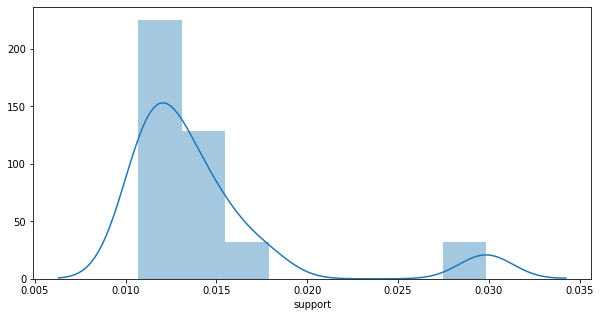

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(rules.support)
plt.show()

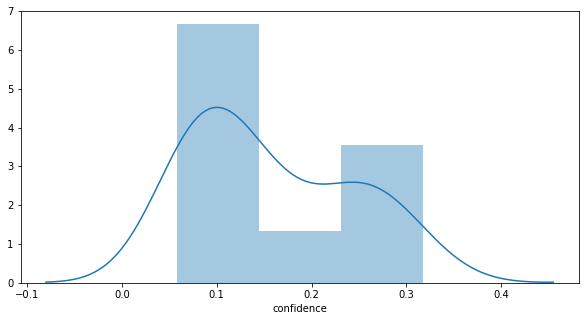

In [36]:
plt.figure(figsize=(10,5))
sns.distplot(rules.confidence)
plt.show()

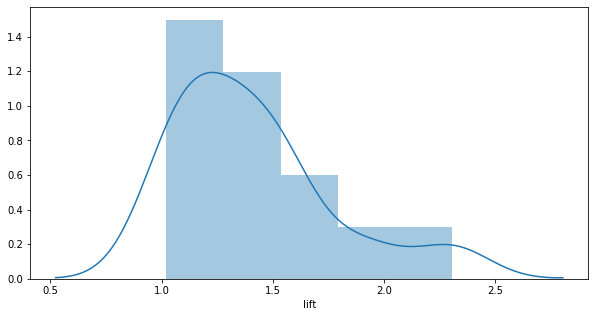

In [37]:
plt.figure(figsize=(10,5))
sns.distplot(rules.lift)
plt.show()

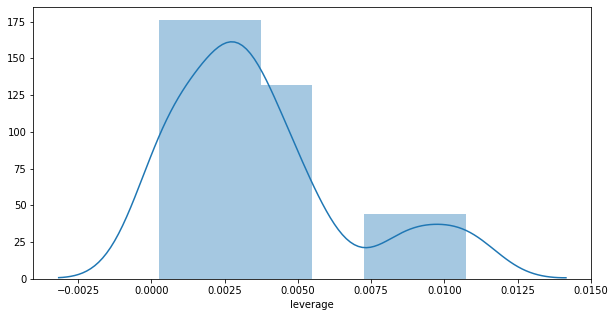

In [38]:
plt.figure(figsize=(10,5))
sns.distplot(rules.leverage)
plt.show()

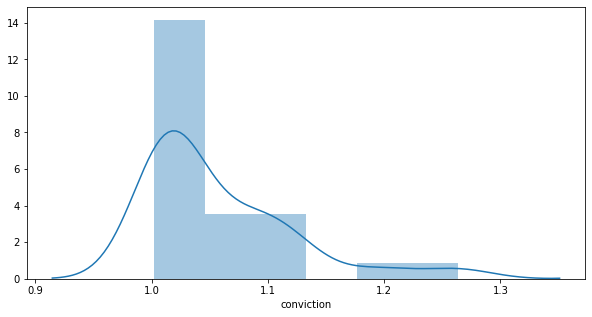

In [39]:
plt.figure(figsize=(10,5))
sns.distplot(rules.conviction)
plt.show()

<Figure size 720x360 with 0 Axes>

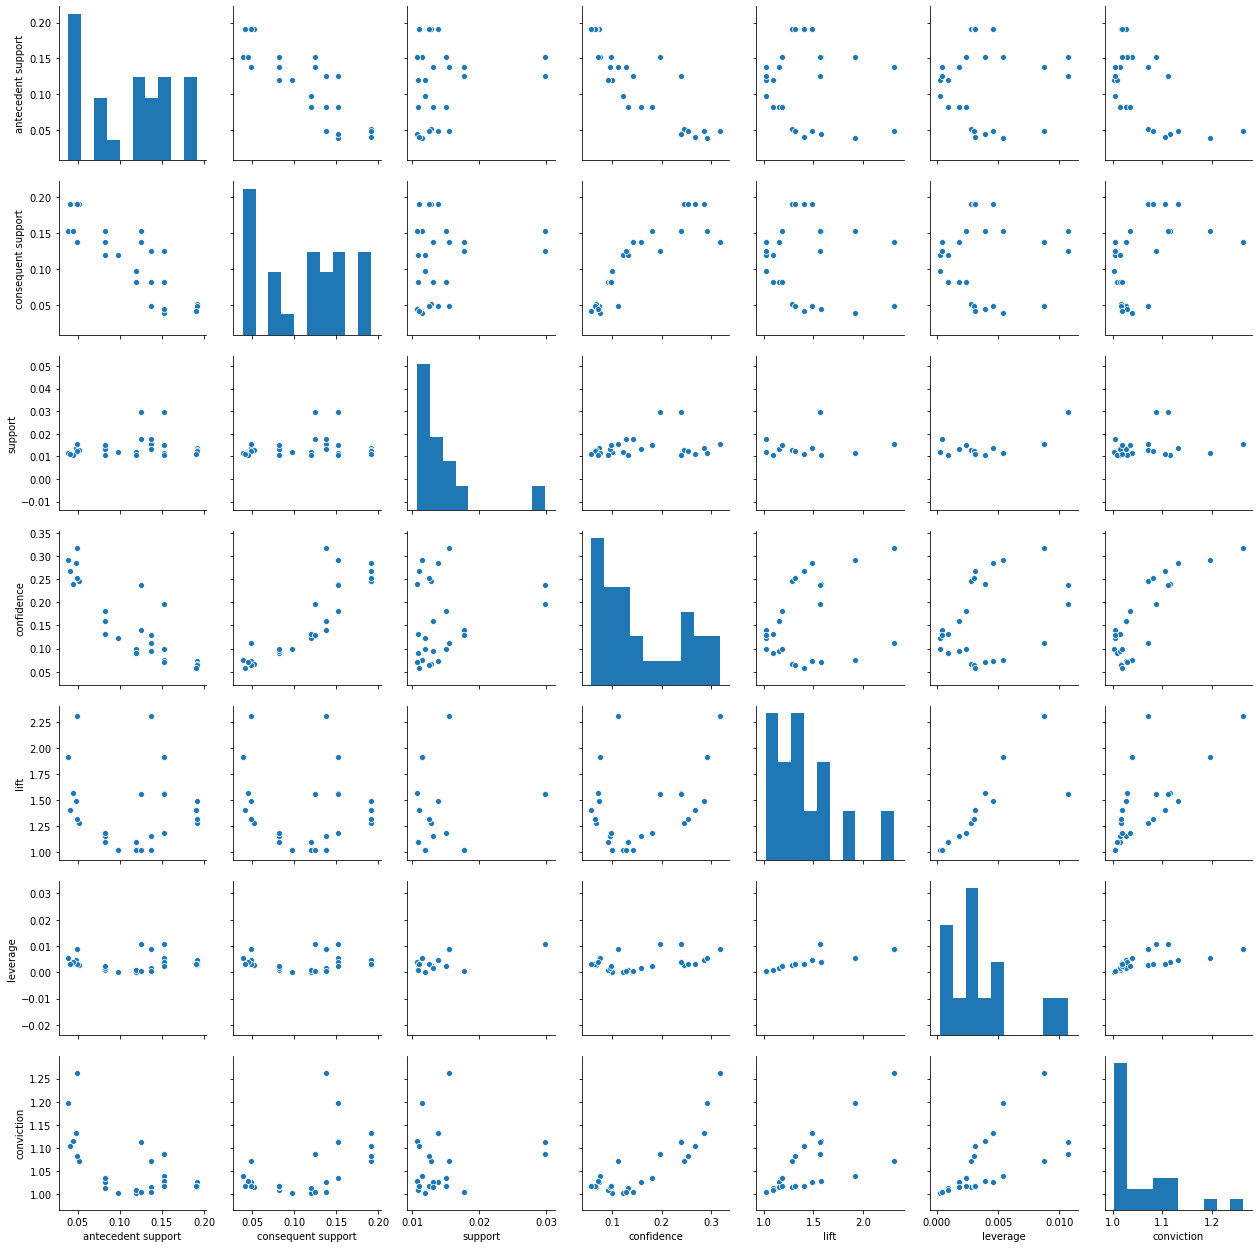

In [43]:
plt.figure(figsize=(10,5))
sns.pairplot(rules)
plt.show()

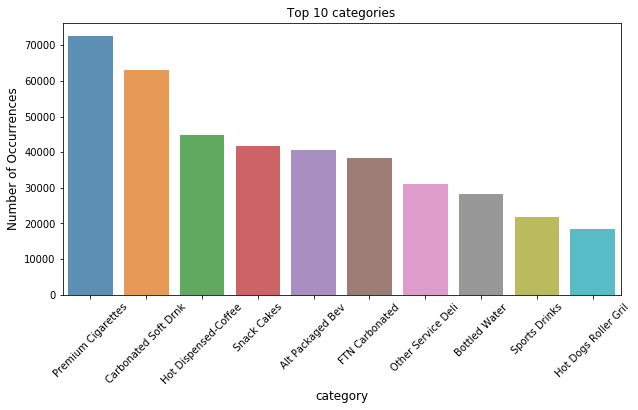

In [33]:
cat_count  = df['category'].value_counts()
cat_count = cat_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(cat_count.index, cat_count.values, alpha=0.8)
plt.title('Top 10 categories')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)
plt.xticks(rotation=45)
plt.show()

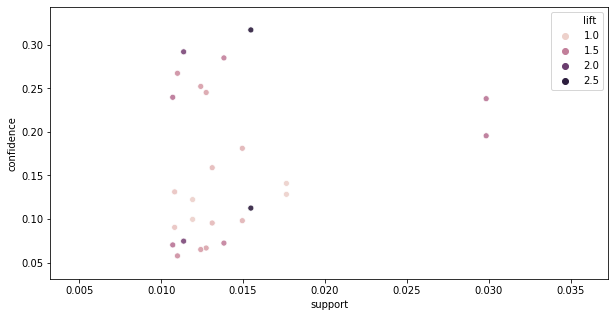

In [46]:
plt.figure(figsize=(10,5))
sns.scatterplot('support','confidence', hue='lift', alpha=0.9, data=rules)
plt.show()